In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
SAVE = '/content/drive/MyDrive/fruitmaster.npz'
DIR = '/content/drive/MyDrive/fruit1/fruit1'

Found 3775 files belonging to 5 classes.
Class names: ['freshapples', 'freshbanana', 'freshcapsicum', 'freshoranges', 'freshtomato']


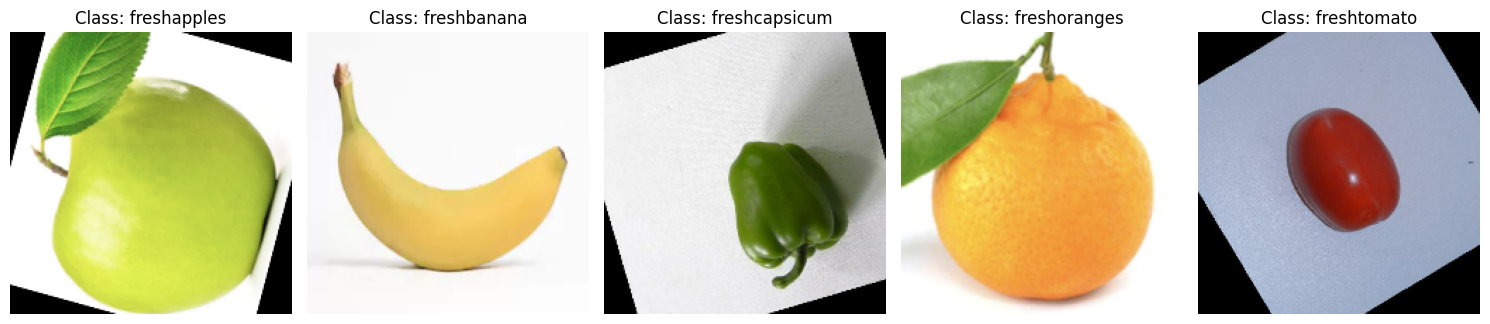

In [ ]:



train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=DIR,
    image_size=(200, 200),
    batch_size=128,
    label_mode='categorical'
)

# Function to extract one image per class
def dataset_to_numpy_one_per_class(dataset):
    # Dictionary to store one image per class
    images_dict = {}
    for img_batch, label_batch in dataset:
        for img, label in zip(img_batch, label_batch):
            index = np.argmax(label.numpy())  # Class index
            name = dataset.names[index]
            if name not in images_dict:  # Add only the first image for each class
                images_dict[name] = (img.numpy(), label.numpy())
            if len(images_dict) == len(dataset.names):  # Stop when all classes are covered
                break
        if len(images_dict) == len(dataset.names):  # Early exit for batches
            break

    # Extract images and labels in the order of class names
    images, labels = [], []
    for name in dataset.names:
        img, lbl = images_dict[name]
        images.append(img)
        labels.append(lbl)

    return np.array(images), np.array(labels), dataset.names

# Get one image per class
train_images, train_labels, names = dataset_to_numpy_one_per_class(train_dataset)

# Print class names for confirmation
print("Class names:", names)

# Visualize one image per class
def visualize_images_one_per_class(images, names):
    plt.figure(figsize=(15, 5))
    for i, (img, name) in enumerate(zip(images, names)):
        plt.subplot(1, len(names), i + 1)
        plt.imshow(img.astype('uint8'))
        plt.title(f"Class: {name}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the images
visualize_images_one_per_class(train_images, names)


In [ ]:
np.savez(DATA_SAVE, images=train_images, labels=train_labels, class_names=names)

In [ ]:
def plot_batch(images, labels, names, batch_size=20, title="Images"):
    total_images = len(images)
    for start in range(0, total_images, batch_size):
        end = min(start + batch_size, total_images)
        batch_images = images[start:end]
        batch_labels = labels[start:end]

        cols = 5
        rows = (batch_size // cols) + 1

        plt.figure(figsize=(15, rows * 3))
        for i in range(len(batch_images)):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(batch_images[i].astype("uint8"))
            # Get the class name from the index
            class_index = np.argmax(batch_labels[i])  # Assuming labels are one-hot encoded
            plt.title(f"Label: {names[class_index]}")
            plt.axis("off")
        plt.suptitle(title, fontsize=16)
        plt.show()

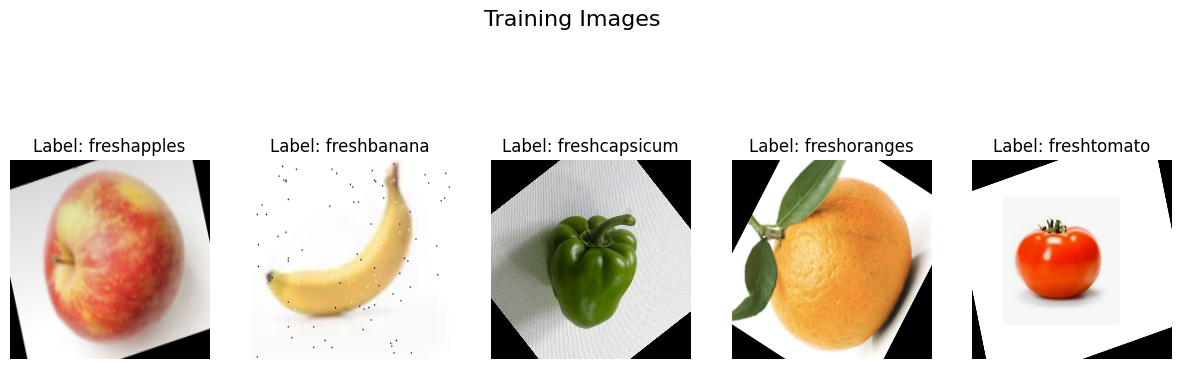

In [ ]:


# Display all training images in batches
plot_batch(train_images, train_labels, names, batch_size=20, title="Training Images")


In [ ]:
def plot_batch(images, labels, batch_size=20, title="Images"):
    total_images = len(images)
    for start in range(0, total_images, batch_size):
        end = min(start + batch_size, total_images)
        batch_images = images[start:end]
        batch_labels = labels[start:end]

        cols = 5
        rows = (batch_size // cols) + 1

        plt.figure(figsize=(15, rows * 3))
        for i in range(len(batch_images)):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(batch_images[i].astype("uint8"))
            plt.title(f"Label: {batch_labels[i]}")
            plt.axis("off")
        plt.suptitle(title, fontsize=16)
        plt.show()

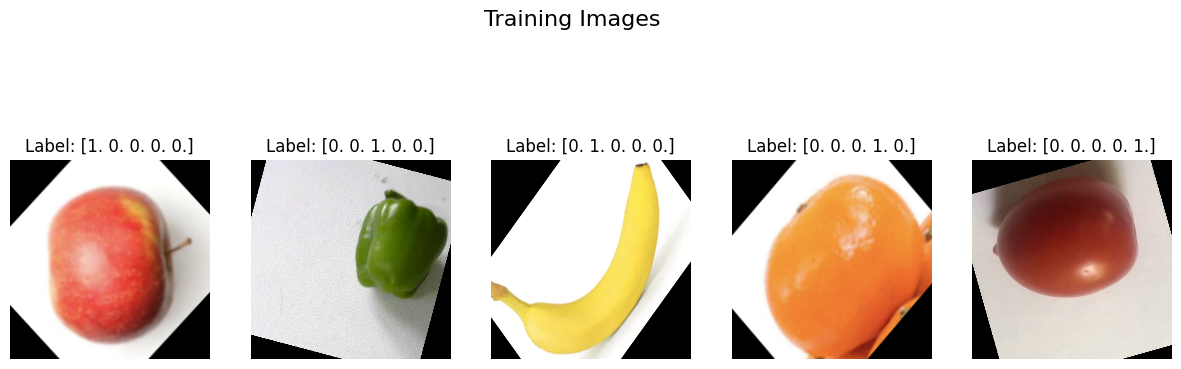

In [ ]:
# Display all training images in batches
plot_batch(train_images, train_labels, batch_size=20, title="Training Images")